# Libaries

In [1]:
import yfinance as yf

# Data collection

In [14]:
usd_inr=yf.download('USDINR=X',start='2024-01-01',end='2025-12-31',interval='1wk')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['USDINR=X']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [3]:
type(usd_inr)

pandas.core.frame.DataFrame

In [4]:
usd_inr

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,,


In [5]:
usd_inr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, USDINR=X)  0 non-null      float64
 1   (Close, USDINR=X)      0 non-null      float64
 2   (High, USDINR=X)       0 non-null      float64
 3   (Low, USDINR=X)        0 non-null      float64
 4   (Open, USDINR=X)       0 non-null      float64
 5   (Volume, USDINR=X)     0 non-null      float64
dtypes: float64(6)
memory usage: 0.0 bytes


In [6]:
usd_inr.reset_index(inplace=True)

In [7]:
usd_inr

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X


In [8]:
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup
# # URL of the page
# url = "https://www.exchange-rates.org/precious-metals/gold-price/india/2024"

# # Send a request to fetch the page content
# response = requests.get(url)

# # Parse the HTML content
# soup = BeautifulSoup(response.text, "html.parser")

# # Find all tables
# tables = soup.find_all("table")

# # Extract tables into DataFrames
# dfs = []
# for table in tables:
#     df = pd.read_html(str(table))[0]
#     dfs.append(df)

# # Print all extracted tables
# for i, df in enumerate(dfs):
#     print(f"Table {i+1}:")
#     print(df)
#     print("\n")

In [9]:
# feature selection
#keep omnly the relavant columns
usd_inr=usd_inr[['Date','Close']]

In [10]:
usd_inr.head()  # before renaming

Price,Date,Close
Ticker,,USDINR=X


In [11]:
usd_inr.columns=['Date','USDINR'] # renaming the columns

In [12]:
usd_inr.head() # after renaming

,Date,USDINR


In [17]:
import pandas as pd
gold_dataset=pd.read_csv("Gold vs USDINR.csv")

In [18]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


In [19]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


# Data Preprocessing

In [20]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,"₹5,066.31"
1,2024-01-08,83.076103,"₹4,966.31"
2,2024-01-15,83.160599,"₹5,015.33"
3,2024-01-22,83.146103,"₹4,950.84"
4,2024-01-29,82.927597,"₹4,976.77"


In [21]:
gold_dataset['Goldrate']=gold_dataset['Goldrate'].replace('₹','',regex=True).replace(',','',regex=True).astype(float)

In [22]:
gold_dataset.head()

,Date,USD_INR,Goldrate
0,2024-01-01,83.240601,5066.31
1,2024-01-08,83.076103,4966.31
2,2024-01-15,83.160599,5015.33
3,2024-01-22,83.146103,4950.84
4,2024-01-29,82.927597,4976.77


In [23]:
gold_dataset.isnull().sum()

Date        0
USD_INR     0
Goldrate    0
dtype: int64

In [24]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [25]:
gold_dataset.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,53,53,2024-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USD_INR,53.0,NaN,NaN,NaN,83.717398,0.637302,82.752296,83.301804,83.544998,83.988998,85.786598
Goldrate,53.0,NaN,NaN,NaN,5891.041321,587.660324,4934.99,5543.85,5874.86,6507.66,6795.35


In [26]:
print(gold_dataset.columns.tolist())

['Date', 'USD_INR', 'Goldrate']


In [27]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      53 non-null     object 
 1   USD_INR   53 non-null     float64
 2   Goldrate  53 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.4+ KB


In [28]:
print(gold_dataset.columns.tolist())

['Date', 'USD_INR', 'Goldrate']


<Axes: ylabel='USD_INR'>

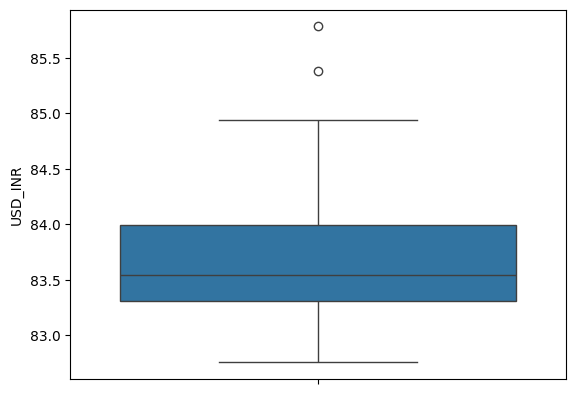

In [30]:
import seaborn as sns
sns.boxplot(gold_dataset['USD_INR'])

<Axes: xlabel='USD_INR', ylabel='Goldrate'>

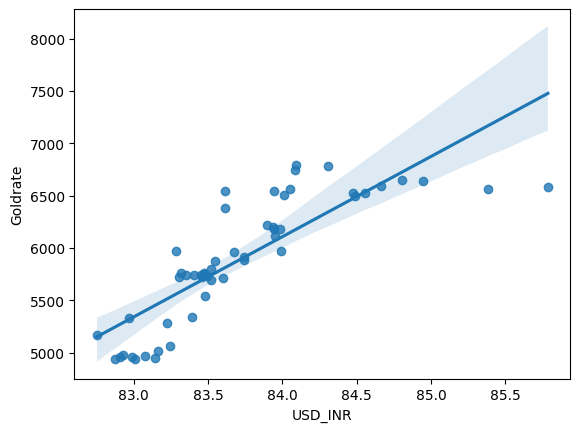

In [31]:
sns.regplot(x='USD_INR',y='Goldrate',data=gold_dataset)

# Model Training

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x=gold_dataset[['USD_INR']]
y=gold_dataset[['Goldrate']]

In [35]:
x.head()

,USD_INR
0,83.240601
1,83.076103
2,83.160599
3,83.146103
4,82.927597


In [36]:
y.head()

,Goldrate
0,5066.31
1,4966.31
2,5015.33
3,4950.84
4,4976.77


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [38]:
x_train.head()

,USD_INR
17,83.406303
50,84.945000
3,83.146103
32,83.948303
13,83.477798


In [39]:
y_train.head()

,Goldrate
17,5744.34
50,6639.21
3,4950.84
32,6114.39
13,5543.85


In [40]:
x_train.shape,x_test.shape

((47, 1), (6, 1))

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [42]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [43]:
x_train_scaled

array([[-0.4753469 ],
       [ 1.91603897],
       [-0.87974106],
       [ 0.36700952],
       [-0.36423189],
       [-1.24606136],
       [-0.33998365],
       [-1.09189238],
       [ 0.28432837],
       [-1.21933493],
       [-0.15146399],
       [-0.17182302],
       [ 0.92354506],
       [ 0.35503362],
       [ 1.69379708],
       [-0.25979254],
       [-1.49178076],
       [-0.63775672],
       [ 0.04932799],
       [ 0.34602205],
       [-0.40604082],
       [-0.7546344 ],
       [-0.7328762 ],
       [ 1.20624748],
       [-0.30097304],
       [ 0.43025651],
       [ 0.461963  ],
       [ 0.05011057],
       [ 1.18371856],
       [-0.98853205],
       [-0.60807784],
       [-0.85721215],
       [ 0.36342862],
       [ 0.42186152],
       [-0.29537637],
       [ 1.48242836],
       [-1.16027359],
       [-0.371536  ],
       [-0.39283176],
       [ 3.22402082],
       [-0.66169667],
       [-1.30527686],
       [ 0.57448905],
       [-0.56394486],
       [-0.05883454],
       [ 2

In [44]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [45]:
model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

In [47]:
model.coef_

array([[469.20755762]])

In [48]:
model.intercept_

array([5878.57340426])

In [50]:
# y=mx+b
m=model.coef_[0][0]
b=model.intercept_[0]

In [51]:
m,b

(np.float64(469.2075576153299), np.float64(5878.573404255313))

In [52]:
x_train_predict=model.predict(x_train_scaled)

Text(0, 0.5, 'Goldrate')

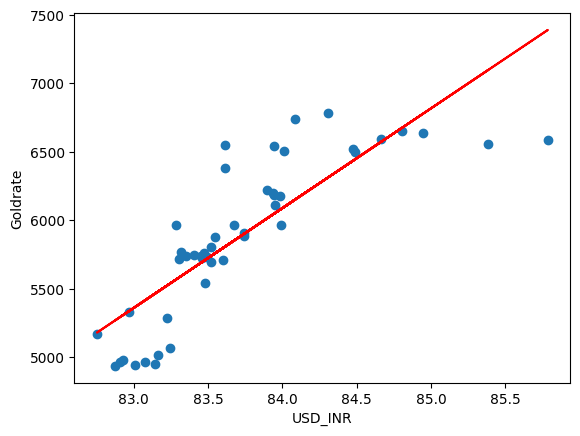

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)
plt.plot(x_train,x_train_predict,color='r')
plt.xlabel('USD_INR')
plt.ylabel('Goldrate')

In [57]:
x_test_predicted=model.predict(x_test_scaled)

In [58]:
x_test_predicted

array([[5620.59829563],
       [6142.81453057],
       [6593.0056487 ],
       [5551.61745506],
       [6176.5404709 ],
       [5186.86402467]])

In [56]:
x_test_scaled

array([[-0.54981022],
       [ 0.56316468],
       [ 1.52263584],
       [-0.69682584],
       [ 0.6350432 ],
       [-1.47420767]])

In [59]:
y_test

,Goldrate
19,5754.39
41,6563.33
47,6524.06
12,5341.21
43,6795.35
5,4953.90


In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
mean_squared_error(y_test,x_test_predicted)

113492.62498473369

# HyperparmaterTunning

In [62]:
from sklearn.model_selection import RandomizedSearchCV
para_space={'copy_X':[True,False],
 'fit_intercept': [True,False],
 'n_jobs':[1,5,10,15, None],
 'positive': [True,False]}

In [63]:
search=RandomizedSearchCV(model,para_space,n_iter=50,cv=5)

In [64]:
search.fit(x_train_scaled,y_train)

D:\DataScience_Finallized Projects\Gold Price Prediction\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,estimator,LinearRegression()
,param_distributions,"{'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [1, 5, ...], 'positive': [True, False]}"
,n_iter,50
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [66]:
search.best_params_

{'positive': True, 'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}

In [68]:
tuned_model=LinearRegression(positive= True, n_jobs=1, fit_intercept=True, copy_X= True)

In [69]:
tuned_model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,1
,positive,True


In [70]:
tuned_model.coef_

array([[469.20755762]])

In [71]:
tuned_model.intercept_

array([5878.57340426])

# MLOPS
    1) save model
    2) build interface
    3) connect model& interface

In [72]:
import pickle

In [73]:
pickle.dump(model,open('model.pkl','wb'))

In [77]:
model_reloaded=pickle.load(open('model.pkl','rb'))

In [78]:
model_reloaded.coef_

array([[469.20755762]])

In [79]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [95]:
import numpy as np
def calculate_gold_rate(usd_inr):
    scaled_input=scaler.transform(np.array(usd_inr).reshape(1,-1))
    return model.predict(scaled_input)
    print(scaled_input)

In [92]:
calculate_gold_rate(80)

D:\DataScience_Finallized Projects\Gold Price Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[2516.03040594]])

In [100]:
import gradio as gr
def calculate_gold_rate(usd_inr):
    scaled_input=scaler.transform(np.array(usd_inr).reshape(1,-1))
    return model.predict(scaled_input)[0][0].round(2)
    #print(scaled_input)
demo = gr.Interface(fn=calculate_gold_rate, inputs=["number"], outputs=["number"],title='How much 1g now')
demo.launch()   

* Running on local URL:  http://127.0.0.1:7867
* To create a public link, set `share=True` in `launch()`.


D:\DataScience_Finallized Projects\Gold Price Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
D:\DataScience_Finallized Projects\Gold Price Prediction\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio\flagged\dataset1.csv


In [ ]:
def 